<a href="https://colab.research.google.com/github/sgtgarrido3rm/datascience_ia/blob/main/1_AutoPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Luís Olavo Garrido - Analista de Inteligência Artificial - Projetos de IA Generativa -> AutoPipeline

In [ ]:
#gpu

In [ ]:
!pip install diffusers transformers safetensors accelerate

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image, AutoPipelineForInpainting
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import torch
import requests
from PIL import Image
from io import BytesIO

## Text to image

In [ ]:
pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
prompt = "a car in a street in a big city"
num_inference_steps = 25

In [ ]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, data_type=torch.float16, use_safetensors=True).to("cuda")

In [ ]:
imagem = pipeline(prompt=prompt,num_inference_steps=num_inference_steps,).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

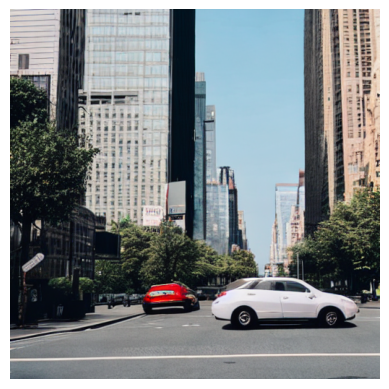

In [ ]:
plt.imshow(imagem)
plt.axis('off')
plt.show()

## Image to Image

In [ ]:
pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
prompt = "The woman when she was a child."
num_inference_steps = 80
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, data_type=torch.float16, use_safetensors=True,
    safety_checker = None).to("cuda")
response = requests.get(url)
imagem = Image.open(BytesIO(response.content)).convert("RGB")

Keyword arguments {'data_type': torch.float16} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
imagem = pipeline(prompt, imagem, num_inference_steps=num_inference_steps).images[0]

  0%|          | 0/64 [00:00<?, ?it/s]

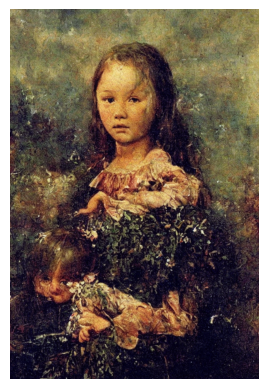

In [ ]:
plt.imshow(imagem)
plt.axis('off')
plt.show()

## InPainting

In [ ]:
pretrained_model_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
prompt = "Mickey Mouse sitting on a bench"
num_inference_steps = 75
imagem = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mascara = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [ ]:
init_image = load_image(imagem).convert("RGB")
mask_image = load_image(mascara).convert("RGB")
pipeline = AutoPipelineForInpainting.from_pretrained(
    pretrained_model_or_path = pretrained_model_or_path, torch_dtype=torch.float16, use_safetensors=True).to("cuda")

In [ ]:
imagem_gen = pipeline(prompt = prompt , image=init_image, mask_image=mask_image, num_inference_steps=num_inference_steps).images[0]

  0%|          | 0/74 [00:00<?, ?it/s]

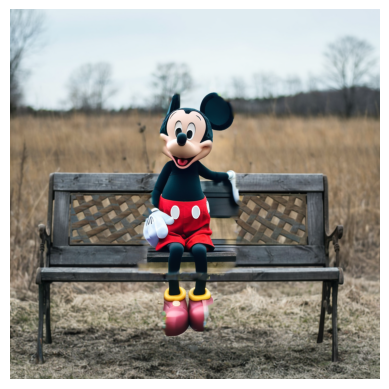

In [ ]:
plt.imshow(imagem_gen)
plt.axis('off')
plt.show()